In [203]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

import scipy.stats  as stats

In [204]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
#read raw data
calendar=pd.read_csv("calendar.csv")
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [206]:
calendar.shape

(1969, 14)

In [207]:
#rename d column to index
calendar=calendar.rename(columns={'d':'index'})

In [208]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,index,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [209]:
#Read sales_train_validation raw data
sales_train_validation=pd.read_csv("sales_train_validation.csv")
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [210]:
sales_train_validation.shape

(30490, 1919)

In [211]:
#read Raw sell_prices data
sell_prices=pd.read_csv("sell_prices.csv")
sell_prices.head(10)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [212]:
sell_prices.shape

(6841121, 4)

In [213]:
sell_prices['wm_yr_wk'].nunique()

282

In [214]:
sell_prices['item_id'].nunique()

3049

In [215]:
#concatenate item_id and store_id to match with validation table column name 
sell_prices['price'] = sell_prices['item_id'].str.cat(sell_prices['store_id'],sep="_")
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price,price
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES_1_001_CA_1
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES_1_001_CA_1
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES_1_001_CA_1
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES_1_001_CA_1
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES_1_001_CA_1


In [216]:
sell_prices.shape

(6841121, 5)

In [217]:
#make the data long to wide, in other word pivot
sell_prices = sell_prices.pivot(index='wm_yr_wk', columns='price', values='sell_price').reset_index()
sell_prices.head()

price,wm_yr_wk,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,11101,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,11102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,11103,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
3,11104,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
4,11105,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94


In [218]:
sell_prices.shape

(282, 30491)

In [219]:
#take a copy of raw sales_train_validation

stv=sales_train_validation.copy()

In [220]:
stv = stv.drop(['item_id','dept_id','cat_id','store_id','state_id'],axis=1)
stv.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [221]:
#transpose the day column to row and vice versa to make a timeseries looks data
stv_T = stv.T
stv_T.columns = stv_T.iloc[0]
stv_T = stv_T[1:]
stv_T.head()

id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [222]:
#reset the index to add as a column
stv_T.reset_index(inplace=True)
stv_T.head()

id,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
0,d_1,0,0,0,0,0,0,0,12,2,...,0,14,1,0,4,0,0,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,0,11,1,0,4,0,0,6,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,0,5,1,0,2,2,0,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,0,6,1,0,5,2,0,2,0,0
4,d_5,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [223]:
stv_T.shape

(1913, 30491)

In [224]:
#Merge with sales_train_validation with calender data
stv_T_merge = pd.merge(stv_T,calendar,on=['index'],how='left')
stv_T_merge.head()

,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,0,0,0,0,0,0,0,12,2,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,0,0,0,0,0,0,0,0,0,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [225]:
stv_T_merge.shape

(1913, 30504)

In [226]:
# Merge sales_train_validation and calender data with sell_prices data
stv_T_merge_all = pd.merge(stv_T_merge,sell_prices,on=['wm_yr_wk'],how='left')
stv_T_merge_all.head()

,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,d_1,0,0,0,0,0,0,0,12,2,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,d_2,0,0,0,0,0,0,0,15,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,d_3,0,0,0,0,0,0,0,0,7,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
3,d_4,0,0,0,0,0,0,0,0,3,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
4,d_5,0,0,0,0,0,0,0,0,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94


In [227]:
stv_T_merge_all.shape

(1913, 60994)

In [228]:
stv_T_merge_all_date_index = stv_T_merge_all.set_index('date')
stv_T_merge_all_date_index.head()

,index,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,d_1,0,0,0,0,0,0,0,12,2,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2011-01-30,d_2,0,0,0,0,0,0,0,15,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2011-01-31,d_3,0,0,0,0,0,0,0,0,7,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2011-02-01,d_4,0,0,0,0,0,0,0,0,3,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2011-02-02,d_5,0,0,0,0,0,0,0,0,0,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94


In [229]:
#t['HOBBIES_1_001_CA_1_validation'].loc[:'2014-08-01'].plot(kind='line')
#t['Sales'].loc['2014-08-01':].plot(kind='line', color='r')
#plt.title('Training (Blue) vs. Testing (Red)')

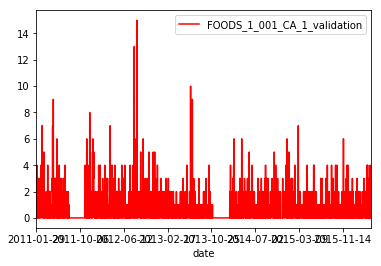

In [230]:
# take one time seris only
t_1  = stv_T_merge_all_date_index[['FOODS_1_001_CA_1_validation']]
t_1.plot(kind='line', color='r')

In [231]:
t_1_dropna = t_1.copy()
t_1_dropna.dropna(axis=0, inplace = True)

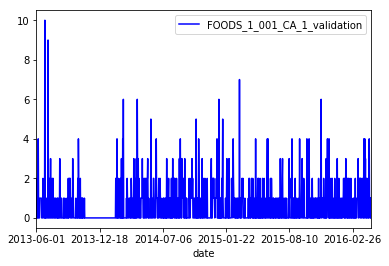

In [232]:
t_1_dropna.loc['2013-06-01':].plot(kind='line', color='b')

# pick one time series with all the explanatory variables

In [233]:
t1_explanVar = stv_T_merge_all[['date','index','month','year','wm_yr_wk','snap_WI','FOODS_1_001_TX_1','FOODS_1_001_TX_1_validation']]
t1_explanVar.head()

,date,index,month,year,wm_yr_wk,snap_WI,FOODS_1_001_TX_1,FOODS_1_001_TX_1_validation
0,2011-01-29,d_1,1,2011,11101,0,2.0,0
1,2011-01-30,d_2,1,2011,11101,0,2.0,1
2,2011-01-31,d_3,1,2011,11101,0,2.0,1
3,2011-02-01,d_4,2,2011,11101,0,2.0,0
4,2011-02-02,d_5,2,2011,11101,1,2.0,0


In [234]:
t1_explanVar.corr()

,month,year,wm_yr_wk,snap_WI,FOODS_1_001_TX_1
month,1.000000,-0.163261,-0.029676,-0.004907,0.102557
year,-0.163261,1.000000,0.988210,0.006004,0.556015
wm_yr_wk,-0.029676,0.988210,1.000000,-0.000307,0.570489
snap_WI,-0.004907,0.006004,-0.000307,1.000000,0.021484
FOODS_1_001_TX_1,0.102557,0.556015,0.570489,0.021484,1.000000


In [235]:
t1_explanVar['FOODS_1_001_TX_1'].corr(t1_explanVar['FOODS_1_001_TX_1_validation'])

AttributeError: 'float' object has no attribute 'shape'

In [253]:
columns_to_be_used = [calendar.columns]

In [254]:
columns_to_be_used

[Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'index',
        'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
        'snap_CA', 'snap_TX', 'snap_WI'],
       dtype='object')]

In [255]:
t1_explanVar = stv_T_merge_all[calendar.columns]
t1_explanVar.head()

,date,wm_yr_wk,weekday,wday,month,year,index,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [256]:
t1_explanVar['FOODS_1_001_TX_1_validation'] = stv_T_merge_all['FOODS_1_001_TX_1_validation']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [257]:
t1_explanVar['FOODS_1_001_CA_1_validation'] = stv_T_merge_all['FOODS_1_001_CA_1_validation']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
t1_explanVar.head()

,date,wm_yr_wk,weekday,wday,month,year,index,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,FOODS_1_001_TX_1_validation,FOODS_1_001_CA_1_validation
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,0,3
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,1,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,1,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,0,1
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,0,4


In [259]:
to_drop = ['snap_CA', 'snap_WI', 'FOODS_1_001_CA_1_validation']

In [260]:
t1_explanVar_v2 = t1_explanVar.drop(to_drop, axis=1)
t1_explanVar_v2.head(10)

,date,wm_yr_wk,weekday,wday,month,year,index,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,FOODS_1_001_TX_1_validation
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,1
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,1
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,0,0
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,0
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,0
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,2
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1


In [261]:
t1_explanVar_v2['event_name_1'].value_counts()

SuperBowl              6
PresidentsDay          6
LentStart              6
LentWeek2              6
StPatricksDay          6
ValentinesDay          6
Purim End              6
Christmas              5
IndependenceDay        5
MartinLutherKingDay    5
Thanksgiving           5
Mother's day           5
EidAlAdha              5
NBAFinalsEnd           5
ColumbusDay            5
OrthodoxChristmas      5
Halloween              5
NBAFinalsStart         5
Ramadan starts         5
VeteransDay            5
Easter                 5
Chanukah End           5
Eid al-Fitr            5
NewYear                5
Pesach End             5
LaborDay               5
MemorialDay            5
Father's day           4
Cinco De Mayo          4
OrthodoxEaster         4
Name: event_name_1, dtype: int64

In [262]:
t1_explanVar_v2['event_type_2'].value_counts()

Cultural     3
Religious    1
Name: event_type_2, dtype: int64

# convert event columns to categorical variables and do label encoding

In [267]:
t1_explanVar_v2['event_name_1'] = t1_explanVar_v2['event_name_1'].astype('category')

In [268]:
t1_explanVar_v2['event_type_1'] = t1_explanVar_v2['event_type_1'].astype('category')

In [269]:
t1_explanVar_v2['event_name_1_cat'] = t1_explanVar_v2['event_name_1'].cat.codes

In [270]:
t1_explanVar_v2['event_type_1_cat'] = t1_explanVar_v2['event_type_1'].cat.codes

In [271]:
t1_explanVar_v2.head()

,date,wm_yr_wk,weekday,wday,month,year,index,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,FOODS_1_001_TX_1_validation,event_name_1_cat,event_type_1_cat
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,-1,-1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,1,-1,-1
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,1,-1,-1
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,0,-1,-1
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,0,0,-1,-1


In [272]:
to_drop = ['weekday','event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']
t1_explanVar_v3 = t1_explanVar_v2.drop(to_drop, axis = 1)

In [273]:
t1_explanVar_v3.head()

,date,wm_yr_wk,wday,month,year,index,snap_TX,FOODS_1_001_TX_1_validation,event_name_1_cat,event_type_1_cat
0,2011-01-29,11101,1,1,2011,d_1,0,0,-1,-1
1,2011-01-30,11101,2,1,2011,d_2,0,1,-1,-1
2,2011-01-31,11101,3,1,2011,d_3,0,1,-1,-1
3,2011-02-01,11101,4,2,2011,d_4,1,0,-1,-1
4,2011-02-02,11101,5,2,2011,d_5,0,0,-1,-1


# Use the code Rossman predictions

In [302]:
Original_procesed_dataset = t1_explanVar_v3.copy()

In [303]:
# original size of data
Original_procesed_dataset.shape

(1913, 10)

In [304]:
# rename two columns
Original_procesed_dataset = Original_procesed_dataset.rename(columns={'date':'Date'})
Original_procesed_dataset = Original_procesed_dataset.rename(columns={'FOODS_1_001_TX_1_validation':'Sales'})

In [305]:
# split out basic time-based features to make date to datetime
import datetime
def make_date(x):
    s = x.split('-')
    return datetime.datetime(int(s[0]),int(s[1]),int(s[2]))

In [306]:
Original_procesed_dataset['Date'] = Original_procesed_dataset['Date'].apply(lambda x : make_date(x))
Original_procesed_dataset.head()

,Date,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat
0,2011-01-29,11101,1,1,2011,d_1,0,0,-1,-1
1,2011-01-30,11101,2,1,2011,d_2,0,1,-1,-1
2,2011-01-31,11101,3,1,2011,d_3,0,1,-1,-1
3,2011-02-01,11101,4,2,2011,d_4,1,0,-1,-1
4,2011-02-02,11101,5,2,2011,d_5,0,0,-1,-1


## futher data processing for adding some new features

In [337]:
t = Original_procesed_dataset.copy()

In [338]:
# extract day of month from the date and creat 'Day' column
t['Day'] = t['Date'].apply(lambda x : x.day)

In [339]:
t.shape

(1913, 11)

In [340]:
t.head()

,Date,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day
0,2011-01-29,11101,1,1,2011,d_1,0,0,-1,-1,29
1,2011-01-30,11101,2,1,2011,d_2,0,1,-1,-1,30
2,2011-01-31,11101,3,1,2011,d_3,0,1,-1,-1,31
3,2011-02-01,11101,4,2,2011,d_4,1,0,-1,-1,1
4,2011-02-02,11101,5,2,2011,d_5,0,0,-1,-1,2


In [341]:
# Add two new columns to find Day of the year in order to get the previous day's sales later
t['DayOfYear'] = t['Date'].apply(lambda x : x.dayofyear)
t['DayOfYear+1'] = t['Date'].apply(lambda x : x.dayofyear+1)

In [342]:
t.shape

(1913, 13)

In [343]:
t.head(10)

,Date,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1
0,2011-01-29,11101,1,1,2011,d_1,0,0,-1,-1,29,29,30
1,2011-01-30,11101,2,1,2011,d_2,0,1,-1,-1,30,30,31
2,2011-01-31,11101,3,1,2011,d_3,0,1,-1,-1,31,31,32
3,2011-02-01,11101,4,2,2011,d_4,1,0,-1,-1,1,32,33
4,2011-02-02,11101,5,2,2011,d_5,0,0,-1,-1,2,33,34
5,2011-02-03,11101,6,2,2011,d_6,1,0,-1,-1,3,34,35
6,2011-02-04,11101,7,2,2011,d_7,0,0,-1,-1,4,35,36
7,2011-02-05,11102,1,2,2011,d_8,1,0,-1,-1,5,36,37
8,2011-02-06,11102,2,2,2011,d_9,1,2,26,3,6,37,38
9,2011-02-07,11102,3,2,2011,d_10,1,1,-1,-1,7,38,39


## inject a trend to the dataset

In [356]:
t_w_trendColumn = t.copy()

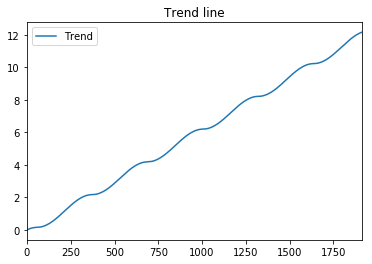

In [362]:
# creating a harmonic trend line
trend = np.cumsum(np.abs(np.cos(np.linspace(1,20,len(t))))*0.01)
trend_df = pd.DataFrame(trend,columns=['Trend'])
trend_df.plot()
plt.title('Trend line')

In [363]:
t_w_trendColumn['Trend'] =  trend_df['Trend']
t_w_trendColumn.head()

,Date,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1,Trend
0,2011-01-29,11101,1,1,2011,d_1,0,0,-1,-1,29,29,30,0.005403
1,2011-01-30,11101,2,1,2011,d_2,0,1,-1,-1,30,30,31,0.010722
2,2011-01-31,11101,3,1,2011,d_3,0,1,-1,-1,31,31,32,0.015957
3,2011-02-01,11101,4,2,2011,d_4,1,0,-1,-1,1,32,33,0.021107
4,2011-02-02,11101,5,2,2011,d_5,0,0,-1,-1,2,33,34,0.026171


In [364]:
t_w_trendColumn.shape

(1913, 14)

In [365]:
# adding the trend with the sales data
t_w_trendColumn['Sales'] = t_w_trendColumn['Sales'] + t_w_trendColumn['Trend']

In [367]:
t_w_trendColumn.head()

,Date,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1,Trend
0,2011-01-29,11101,1,1,2011,d_1,0,0.00540302,-1,-1,29,29,30,0.005403
1,2011-01-30,11101,2,1,2011,d_2,0,1.01072,-1,-1,30,30,31,0.010722
2,2011-01-31,11101,3,1,2011,d_3,0,1.01596,-1,-1,31,31,32,0.015957
3,2011-02-01,11101,4,2,2011,d_4,1,0.0211067,-1,-1,1,32,33,0.021107
4,2011-02-02,11101,5,2,2011,d_5,0,0.0261711,-1,-1,2,33,34,0.026171


In [368]:
# setting index to date and sort them from lower date to higher date : year, 2013 - year, 2015
t_w_trendColumn.set_index('Date',inplace = True).sort_index()

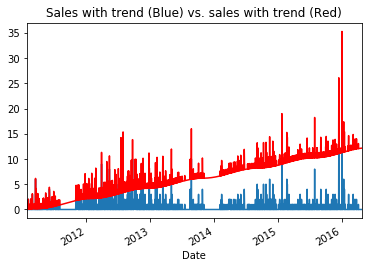

In [373]:
plt.plot(Original_procesed_dataset['Date'], Original_procesed_dataset['Sales'])
t_w_trendColumn['Sales'].plot(kind = 'line', color = 'r')
plt.title('Sales with trend (Blue) vs. sales with trend (Red)')

In [377]:
t = t_w_trendColumn.copy()

In [379]:
t.shape

(1913, 13)

In [378]:
t.head()

,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1,Trend
Date,,,,,,,,,,,,,
2011-01-29,11101,1,1,2011,d_1,0,0.00540302,-1,-1,29,29,30,0.005403
2011-01-30,11101,2,1,2011,d_2,0,1.01072,-1,-1,30,30,31,0.010722
2011-01-31,11101,3,1,2011,d_3,0,1.01596,-1,-1,31,31,32,0.015957
2011-02-01,11101,4,2,2011,d_4,1,0.0211067,-1,-1,1,32,33,0.021107
2011-02-02,11101,5,2,2011,d_5,0,0.0261711,-1,-1,2,33,34,0.026171


In [382]:
# drop the trend column
t.drop('Trend', axis = 1, inplace = True)
t.head()

,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1
Date,,,,,,,,,,,,
2011-01-29,11101,1,1,2011,d_1,0,0.00540302,-1,-1,29,29,30
2011-01-30,11101,2,1,2011,d_2,0,1.01072,-1,-1,30,30,31
2011-01-31,11101,3,1,2011,d_3,0,1.01596,-1,-1,31,31,32
2011-02-01,11101,4,2,2011,d_4,1,0.0211067,-1,-1,1,32,33
2011-02-02,11101,5,2,2011,d_5,0,0.0261711,-1,-1,2,33,34


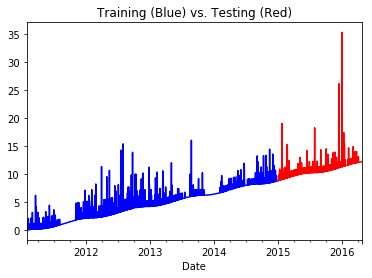

In [383]:
# plot train and testing data set
t['Sales'].loc[:'2014-12-31'].plot(kind='line', color = 'b')
t['Sales'].loc['2014-12-31':].plot(kind='line', color='r')
plt.title('Training (Blue) vs. Testing (Red)')

In [384]:
# Combining current day's data with previous day's data
t.reset_index(inplace=True)
df = t.merge(t, left_on = ['year','DayOfYear'], right_on = ['year','DayOfYear+1'], suffixes=['','_day-1'])
df.head()

,Date,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,...,wday_day-1,month_day-1,index_day-1,snap_TX_day-1,Sales_day-1,event_name_1_cat_day-1,event_type_1_cat_day-1,Day_day-1,DayOfYear_day-1,DayOfYear+1_day-1
0,2011-01-30,11101,2,1,2011,d_2,0,1.01072,-1,-1,...,1,1,d_1,0,0.00540302,-1,-1,29,29,30
1,2011-01-31,11101,3,1,2011,d_3,0,1.01596,-1,-1,...,2,1,d_2,0,1.01072,-1,-1,30,30,31
2,2011-02-01,11101,4,2,2011,d_4,1,0.0211067,-1,-1,...,3,1,d_3,0,1.01596,-1,-1,31,31,32
3,2011-02-02,11101,5,2,2011,d_5,0,0.0261711,-1,-1,...,4,2,d_4,1,0.0211067,-1,-1,1,32,33
4,2011-02-03,11101,6,2,2011,d_6,1,0.0311495,-1,-1,...,5,2,d_5,0,0.0261711,-1,-1,2,33,34


In [385]:
df.shape

(1907, 25)

In [386]:
bad_words = set(['Day','month','year','Date'])
def select_df_cols(df,suffix):
    return df[[x for x in df.columns if (suffix in x and not np.any([word in x for word in bad_words])) or x=='Date']]

df = select_df_cols(df, '_day-1')

In [387]:
df.head()

,Date,wm_yr_wk_day-1,wday_day-1,index_day-1,snap_TX_day-1,Sales_day-1,event_name_1_cat_day-1,event_type_1_cat_day-1
0,2011-01-30,11101,1,d_1,0,0.00540302,-1,-1
1,2011-01-31,11101,2,d_2,0,1.01072,-1,-1
2,2011-02-01,11101,3,d_3,0,1.01596,-1,-1
3,2011-02-02,11101,4,d_4,1,0.0211067,-1,-1
4,2011-02-03,11101,5,d_5,0,0.0261711,-1,-1


In [388]:
dfs = []
dfs.append(t.copy())
dfs.append(df)

In [389]:
dfs

[           Date  wm_yr_wk  wday  month  year   index  snap_TX       Sales  \
 0    2011-01-29     11101     1      1  2011     d_1        0  0.00540302   
 1    2011-01-30     11101     2      1  2011     d_2        0     1.01072   
 2    2011-01-31     11101     3      1  2011     d_3        0     1.01596   
 3    2011-02-01     11101     4      2  2011     d_4        1   0.0211067   
 4    2011-02-02     11101     5      2  2011     d_5        0   0.0261711   
 5    2011-02-03     11101     6      2  2011     d_6        1   0.0311495   
 6    2011-02-04     11101     7      2  2011     d_7        0   0.0360415   
 7    2011-02-05     11102     1      2  2011     d_8        1   0.0408466   
 8    2011-02-06     11102     2      2  2011     d_9        1     2.04556   
 9    2011-02-07     11102     3      2  2011    d_10        1     1.05019   
 10   2011-02-08     11102     4      2  2011    d_11        0   0.0547357   
 11   2011-02-09     11102     5      2  2011    d_12        1  

In [390]:
dfs = [df.set_index('Date') for df in dfs]

In [391]:
dfs

[            wm_yr_wk  wday  month  year   index  snap_TX       Sales  \
 Date                                                                   
 2011-01-29     11101     1      1  2011     d_1        0  0.00540302   
 2011-01-30     11101     2      1  2011     d_2        0     1.01072   
 2011-01-31     11101     3      1  2011     d_3        0     1.01596   
 2011-02-01     11101     4      2  2011     d_4        1   0.0211067   
 2011-02-02     11101     5      2  2011     d_5        0   0.0261711   
 2011-02-03     11101     6      2  2011     d_6        1   0.0311495   
 2011-02-04     11101     7      2  2011     d_7        0   0.0360415   
 2011-02-05     11102     1      2  2011     d_8        1   0.0408466   
 2011-02-06     11102     2      2  2011     d_9        1     2.04556   
 2011-02-07     11102     3      2  2011    d_10        1     1.05019   
 2011-02-08     11102     4      2  2011    d_11        0   0.0547357   
 2011-02-09     11102     5      2  2011    d_12   

In [392]:
nt = pd.concat(dfs, axis=1).dropna(axis=0)

In [393]:
nt.shape

(1907, 19)

In [394]:
nt.head()

,wm_yr_wk,wday,month,year,index,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1,wm_yr_wk_day-1,wday_day-1,index_day-1,snap_TX_day-1,Sales_day-1,event_name_1_cat_day-1,event_type_1_cat_day-1
Date,,,,,,,,,,,,,,,,,,,
2011-01-30,11101,2,1,2011,d_2,0,1.01072,-1,-1,30,30,31,11101.0,1.0,d_1,0.0,0.00540302,-1.0,-1.0
2011-01-31,11101,3,1,2011,d_3,0,1.01596,-1,-1,31,31,32,11101.0,2.0,d_2,0.0,1.01072,-1.0,-1.0
2011-02-01,11101,4,2,2011,d_4,1,0.0211067,-1,-1,1,32,33,11101.0,3.0,d_3,0.0,1.01596,-1.0,-1.0
2011-02-02,11101,5,2,2011,d_5,0,0.0261711,-1,-1,2,33,34,11101.0,4.0,d_4,1.0,0.0211067,-1.0,-1.0
2011-02-03,11101,6,2,2011,d_6,1,0.0311495,-1,-1,3,34,35,11101.0,5.0,d_5,0.0,0.0261711,-1.0,-1.0


In [406]:
nt.drop(['index','index_day-1'], axis = 1, inplace = True)

In [407]:
nt.shape

(1907, 17)

In [408]:
nt.head()

,wm_yr_wk,wday,month,year,snap_TX,Sales,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1,wm_yr_wk_day-1,wday_day-1,snap_TX_day-1,Sales_day-1,event_name_1_cat_day-1,event_type_1_cat_day-1
Date,,,,,,,,,,,,,,,,,
2011-01-30,11101,2,1,2011,0,1.01072,-1,-1,30,30,31,11101.0,1.0,0.0,0.00540302,-1.0,-1.0
2011-01-31,11101,3,1,2011,0,1.01596,-1,-1,31,31,32,11101.0,2.0,0.0,1.01072,-1.0,-1.0
2011-02-01,11101,4,2,2011,1,0.0211067,-1,-1,1,32,33,11101.0,3.0,0.0,1.01596,-1.0,-1.0
2011-02-02,11101,5,2,2011,0,0.0261711,-1,-1,2,33,34,11101.0,4.0,1.0,0.0211067,-1.0,-1.0
2011-02-03,11101,6,2,2011,1,0.0311495,-1,-1,3,34,35,11101.0,5.0,0.0,0.0261711,-1.0,-1.0


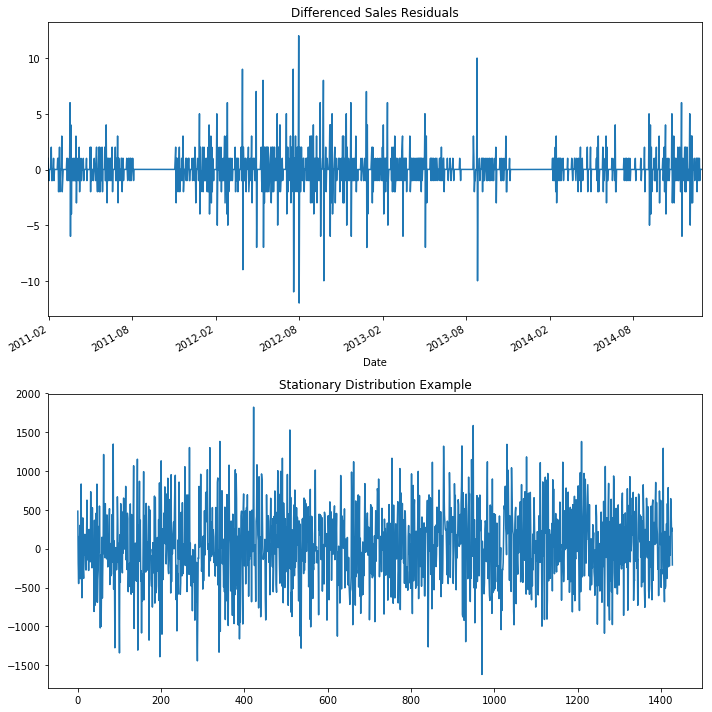

In [409]:
# Making Training Set
X_train = nt.iloc[:np.where(nt.index == '2014-12-31')[0][0], :]
X_test = nt.iloc[np.where(nt.index == '2014-12-31')[0][0]:, :]

# Check the basic differencing residuals on the training set
f, axs = plt.subplots(2, figsize=(10,10))
(X_train['Sales']-X_train['Sales_day-1']).plot(kind='line', ax=axs[0])
axs[0].set_title('Differenced Sales Residuals')
# Compare to a sampling the normal distribution in time
axs[1].plot(np.random.normal(0,500,size=len(X_train)))
axs[1].set_title('Stationary Distribution Example')
plt.tight_layout()

In [410]:
X_train.shape

(1428, 17)

In [411]:
X_test.shape

(479, 17)

# Training

In [412]:
y = X_train['Sales'] - X_train['Sales_day-1'] # For the statistical data model approach
y2 = X_train['Sales'] # No statistical data model

In [413]:
# remove sales data from the training and testing set
to_drop = ['Sales']
X = X_train.drop(to_drop, axis=1)
X_test_p = X_test.drop(to_drop, axis=1 )

In [414]:
X.head()

,wm_yr_wk,wday,month,year,snap_TX,event_name_1_cat,event_type_1_cat,Day,DayOfYear,DayOfYear+1,wm_yr_wk_day-1,wday_day-1,snap_TX_day-1,Sales_day-1,event_name_1_cat_day-1,event_type_1_cat_day-1
Date,,,,,,,,,,,,,,,,
2011-01-30,11101,2,1,2011,0,-1,-1,30,30,31,11101.0,1.0,0.0,0.00540302,-1.0,-1.0
2011-01-31,11101,3,1,2011,0,-1,-1,31,31,32,11101.0,2.0,0.0,1.01072,-1.0,-1.0
2011-02-01,11101,4,2,2011,1,-1,-1,1,32,33,11101.0,3.0,0.0,1.01596,-1.0,-1.0
2011-02-02,11101,5,2,2011,0,-1,-1,2,33,34,11101.0,4.0,1.0,0.0211067,-1.0,-1.0
2011-02-03,11101,6,2,2011,1,-1,-1,3,34,35,11101.0,5.0,0.0,0.0261711,-1.0,-1.0


In [420]:
from sklearn.ensemble import GradientBoostingRegressor

# Using our statistical data model
model = GradientBoostingRegressor(n_estimators=1)
model.fit(X,y)

# No statistical data model
model2 = GradientBoostingRegressor(n_estimators=50)
model2.fit(X,y2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


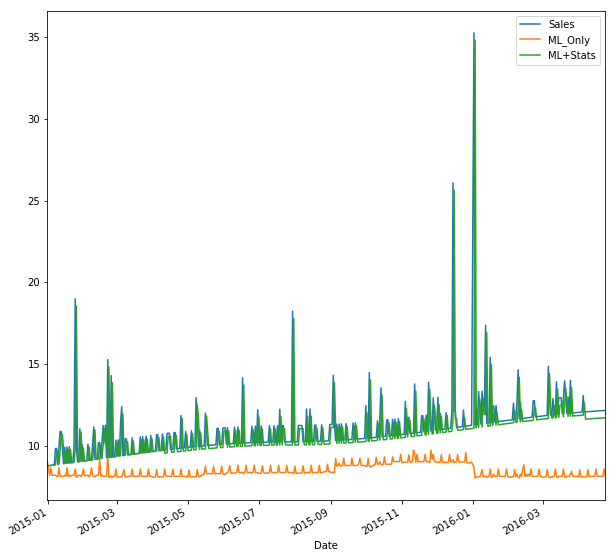

In [421]:
X_test['ML+Stats'] = model.predict(X_test_p) + X_test['Sales_day-1'] # Using our data model / theory
X_test['ML_Only'] = model2.predict(X_test_p) # Vanilla ML model

X_test[['Sales','ML_Only','ML+Stats']].plot(kind="line", figsize=(10,10))

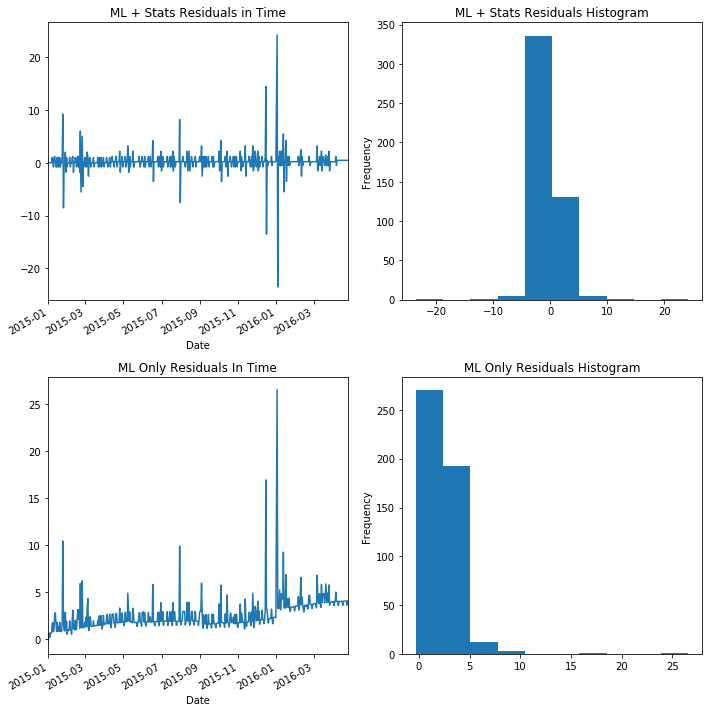

In [422]:
f, axs=plt.subplots(2,2, figsize=(10,10))
(X_test['Sales']-X_test['ML+Stats']).plot(kind="line", ax=axs[0][0])
axs[0][0].set_title('ML + Stats Residuals in Time')
axs[0][1].set_title('ML + Stats Residuals Histogram')

(X_test['Sales']-X_test['ML+Stats']).plot(kind="hist", ax=axs[0][1])

(X_test['Sales']-X_test['ML_Only']).plot(kind="line", ax=axs[1][0])
(X_test['Sales']-X_test['ML_Only']).plot(kind="hist", ax=axs[1][1])

axs[1][0].set_title('ML Only Residuals In Time')
axs[1][1].set_title('ML Only Residuals Histogram')
plt.tight_layout()

In [423]:
print('ML + Stats RMSPE', np.sqrt(np.mean(((X_test['Sales']-X_test['ML+Stats'])/X_test['Sales'])**2)))
print('ML Only RMSPE', np.sqrt(np.mean(((X_test['Sales']-X_test['ML_Only'])/X_test['Sales'])**2)))

ML + Stats RMSPE 0.163107984127
ML Only RMSPE 0.239974149114


# removing the trend

In [427]:
np.where(t_w_trendColumn.index == '2014-12-31')[0][0]

1432

In [428]:
t_w_trendColumn['Trend'].head()

Date
2011-01-29    0.005403
2011-01-30    0.010722
2011-01-31    0.015957
2011-02-01    0.021107
2011-02-02    0.026171
Name: Trend, dtype: float64

In [463]:
trend_test = t_w_trendColumn[['Trend']].iloc[np.where(t_w_trendColumn.index == '2014-12-31')[0][0]:]
trend_test.shape

(481, 1)

In [464]:
trend_test.isnull().sum()

Trend    0
dtype: int64

In [442]:
trend_test.head()

,Trend
Date,
2014-12-31,8.760758
2015-01-01,8.769683
2015-01-02,8.778653
2015-01-03,8.787666
2015-01-04,8.796722


In [436]:
X_test['ML+Stats'].head()

Date
2014-12-31    8.76142
2015-01-02    8.77922
2015-01-03    8.78819
2015-01-04     8.7972
2015-01-05    8.80626
Name: ML+Stats, dtype: object

In [465]:
X_predicted = X_test[['ML+Stats']]
X_predicted.head()

,ML+Stats
Date,
2014-12-31,8.76142
2015-01-02,8.77922
2015-01-03,8.78819
2015-01-04,8.7972
2015-01-05,8.80626


In [466]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([X_predicted, trend_test], axis=1)

In [467]:
horizontal_stack.head()

,ML+Stats,Trend
Date,,
2014-12-31,8.76142,8.760758
2015-01-01,NaN,8.769683
2015-01-02,8.77922,8.778653
2015-01-03,8.78819,8.787666
2015-01-04,8.7972,8.796722


In [468]:
horizontal_stack[horizontal_stack.isnull().any(axis=1)]

,ML+Stats,Trend
Date,,
2015-01-01,NaN,8.769683
2016-01-01,NaN,11.254415


In [469]:
# propagate non-null values forward
horizontal_stack.fillna(method='ffill', inplace=True)
horizontal_stack.head()

,ML+Stats,Trend
Date,,
2014-12-31,8.761416,8.760758
2015-01-01,8.761416,8.769683
2015-01-02,8.779221,8.778653
2015-01-03,8.788190,8.787666
2015-01-04,8.797203,8.796722


In [470]:
# substract the trend column
horizontal_stack['Predicted - Trend'] = horizontal_stack['ML+Stats'] - horizontal_stack['Trend']

Date
2014-12-31    0.000657
2015-01-01   -0.008268
2015-01-02    0.000568
2015-01-03    0.000524
2015-01-04    0.000482
Freq: D, Name: Predicted - Trend, dtype: float64

In [471]:
horizontal_stack.head()

,ML+Stats,Trend,Predicted - Trend
Date,,,
2014-12-31,8.761416,8.760758,0.000657
2015-01-01,8.761416,8.769683,-0.008268
2015-01-02,8.779221,8.778653,0.000568
2015-01-03,8.788190,8.787666,0.000524
2015-01-04,8.797203,8.796722,0.000482


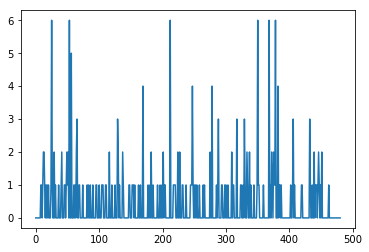

In [493]:
x = horizontal_stack['Predicted - Trend']
bins = [0.5, 1, 2, 3, 4, 5]
plt.plot(np.digitize(x,bins,right=False))

In [489]:
np.sum(x<0.5)

329

In [495]:
x_ceil = np.ceil(x)

In [496]:
x_round = np.round(x)

In [481]:
oldsales = Original_procesed_dataset.copy()

In [482]:
oldsales.set_index('Date', inplace = True)

In [486]:
oldsales_test  = oldsales.iloc[np.where(oldsales.index == '2014-12-31')[0][0]:, :]

In [487]:
np.sum(oldsales_test['Sales']<=0)

329

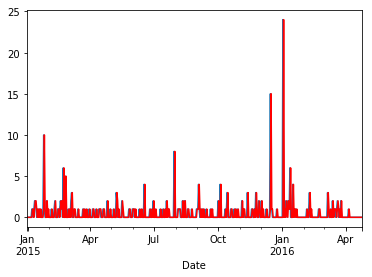

In [498]:
oldsales_test['Sales'].plot()
x_round.plot(color='r')

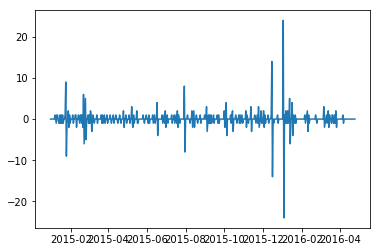

In [500]:
oldsales_test['Sales'] - x_round

# using tree based method

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


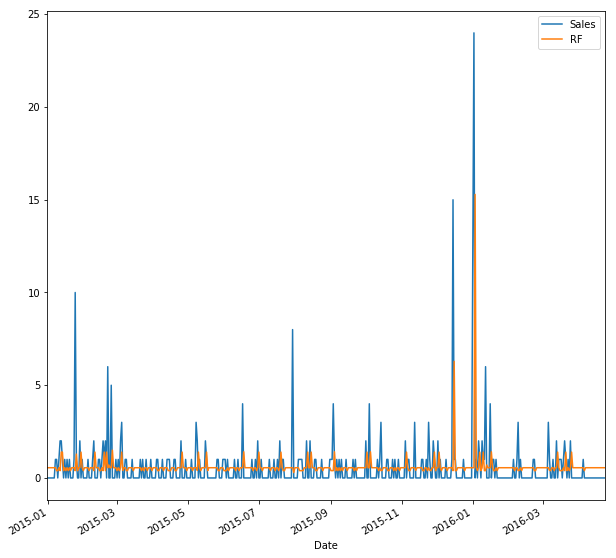

In [93]:
X_test['RF'] = regr.predict(X_test_p) + X_test['Sales_day-1'] # Using our data model / theory

X_test[['Sales','RF',]].plot(kind="line", figsize=(10,10))